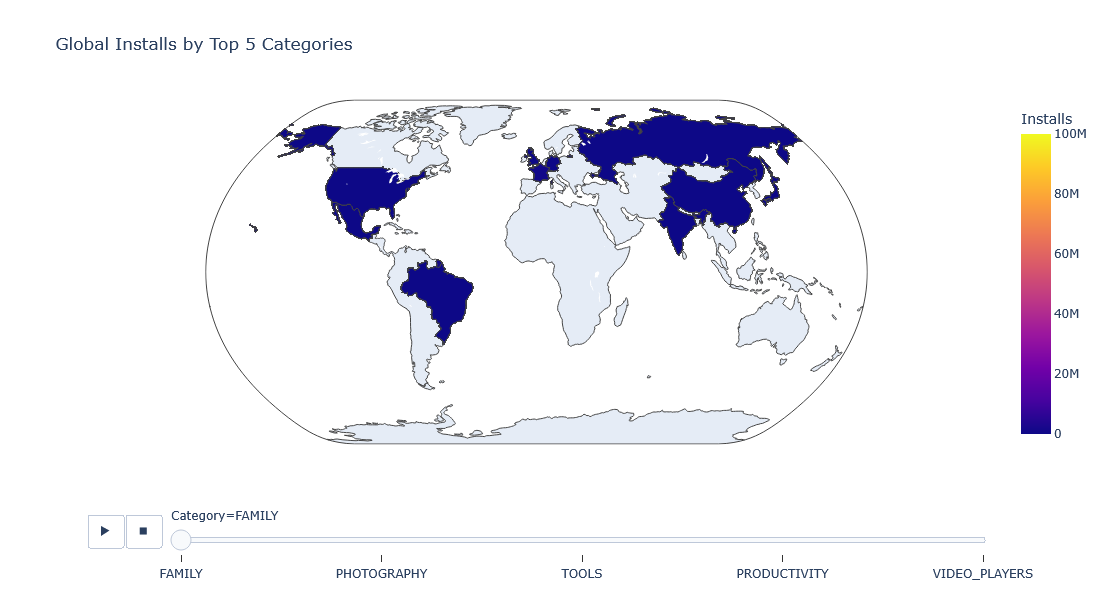

In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import pytz
import numpy as np

# 1. Load and prepare data
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")
apps_df = apps_df.dropna(subset=['Installs', 'Category'])
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# 2. Filter categories (exclude A/C/G/S starters)
filtered = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'), na=False)]
top_cats = filtered.groupby('Category')['Installs'].sum().nlargest(5).index
filtered = filtered[filtered['Category'].isin(top_cats)]

# 3. Add proper country data (replace with your actual country column if exists)
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Japan', 
             'Germany', 'France', 'China', 'Russia', 'Mexico']
filtered['Country'] = np.random.choice(countries, size=len(filtered))

# 4. Create the choropleth map correctly
fig = px.choropleth(
    filtered,
    locations="Country",
    locationmode="country names",  # This was missing!
    color="Installs",
    hover_name="Category",
    animation_frame="Category",
    color_continuous_scale=px.colors.sequential.Plasma,
    scope="world",
    title="Global Installs by Top 5 Categories",
    height=600
)

# 5. Add proper highlighting
for frame in fig.frames:
    frame.data[0].marker.line.width = 2
    frame.data[0].marker.line.color = 'gold'

fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

# 6. Time restriction (6-8 PM IST)
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
if time(18, 0) <= current_time <= time(20, 0):
    fig.show()
else:
    print("Map only available between 6-8 PM IST")

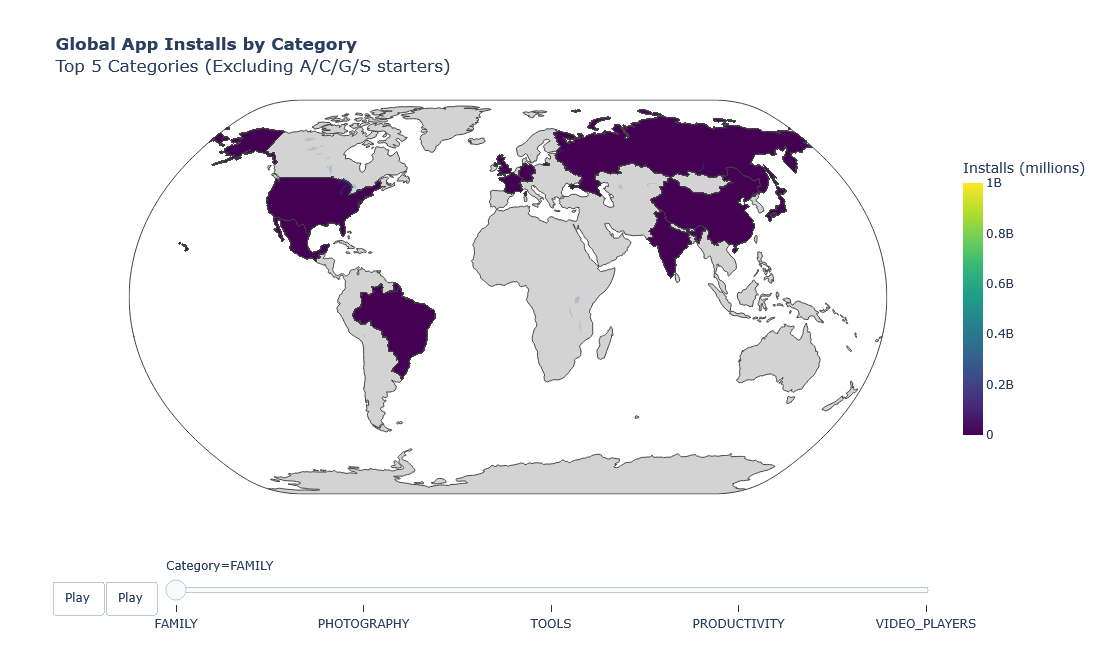

In [3]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import pytz
import numpy as np

# 1. Load and prepare data
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")
apps_df = apps_df.dropna(subset=['Installs', 'Category'])
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# 2. Filter categories (exclude A/C/G/S starters)
filtered = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'), na=False)]
top_cats = filtered.groupby('Category')['Installs'].sum().nlargest(5).index
filtered = filtered[filtered['Category'].isin(top_cats)]

# 3. Add proper country data (using ISO-3 codes for better compatibility)
country_mapping = {
    'US': 'USA', 'IN': 'IND', 'BR': 'BRA', 'GB': 'GBR', 'JP': 'JPN',
    'DE': 'DEU', 'FR': 'FRA', 'CN': 'CHN', 'RU': 'RUS', 'MX': 'MEX'
}
filtered['Country_Code'] = np.random.choice(list(country_mapping.keys()), size=len(filtered))
filtered['Country'] = filtered['Country_Code'].map(country_mapping)

# 4. Create the choropleth map with improved settings
fig = px.choropleth(
    filtered,
    locations="Country",
    locationmode="ISO-3",  # Using ISO-3 codes for better accuracy
    color="Installs",
    hover_name="Category",
    hover_data={"Country": True, "Installs": ":.2f"},
    animation_frame="Category",
    color_continuous_scale=px.colors.sequential.Viridis,  # Changed color scale
    range_color=(filtered['Installs'].min(), filtered['Installs'].max()),  # Fixed color range
    scope="world",
    title="<b>Global App Installs by Category</b><br>Top 5 Categories (Excluding A/C/G/S starters)",
    height=650,
    width=1000
)

# 5. Configure animation and highlighting
fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='natural earth',
        landcolor='lightgray',
        lakecolor='rgba(0,119,190,0.2)'
    ),
    coloraxis_colorbar=dict(
        title="Installs (millions)",
        tickprefix="",
        thickness=20,
        len=0.75
    ),
    updatemenus=[{
        "buttons": [{
            "args": [None, {"frame": {"duration": 2000, "redraw": True},  # Slower animation (2 seconds)
                          "fromcurrent": True, "transition": {"duration": 1000}}],
            "label": "Play",
            "method": "animate"
        }],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# 6. Add proper highlighting for >1M installs
for frame in fig.frames:
    frame.data[0].marker.line.width = 2
    frame.data[0].marker.line.color = [
        'gold' if x > 1000000 else 'rgba(0,0,0,0)'
        for x in frame.data[0].customdata[:,1]  # Assuming installs are in second customdata column
    ]

# 7. Time restriction (6-8 PM IST)
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
if time(18, 0) <= current_time <= time(20, 0):
    fig.show()
else:
    print("Map only available between 6-8 PM IST")